In [246]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

image = cv2.imread('img1.jpg')
imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Chaneg Image to GrayScale

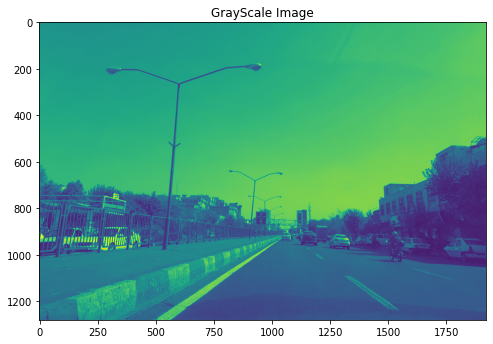

In [247]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(8,6))
plt.title("GrayScale Image")
plt.imshow(gray)
plt.show()

Use Canny Without Image smoothing

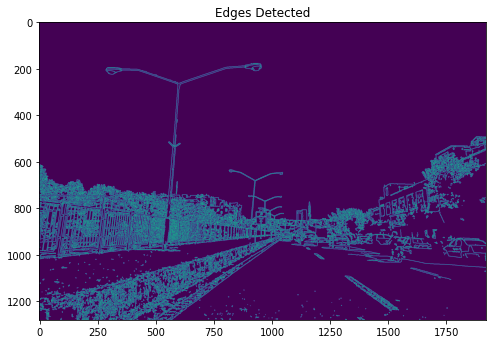

In [248]:
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(gray, low_threshold, high_threshold)
plt.figure(figsize=(8,6))
plt.title("Edges Detected")
plt.imshow(edges)
plt.show()

Use Gaussian Filter


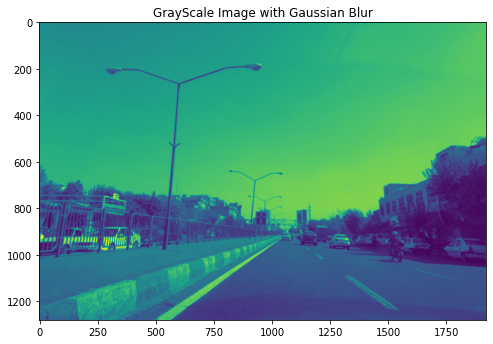

In [249]:
kernel_size = 7
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)
plt.figure(figsize=(8,6))
plt.title("GrayScale Image with Gaussian Blur")
plt.imshow(blur_gray)

Use Canny with Image Smoothing

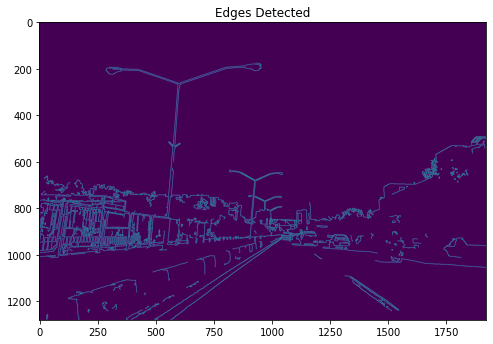

In [250]:
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
plt.figure(figsize=(8,6))
plt.title("Edges Detected")
plt.imshow(edges)

Find Region of Interest

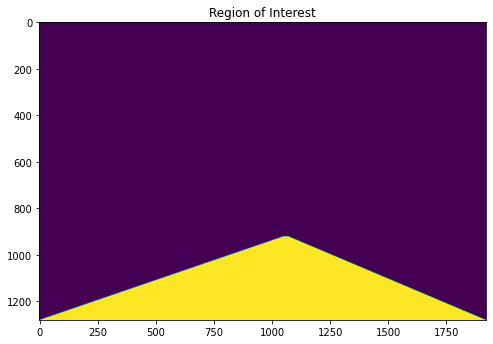

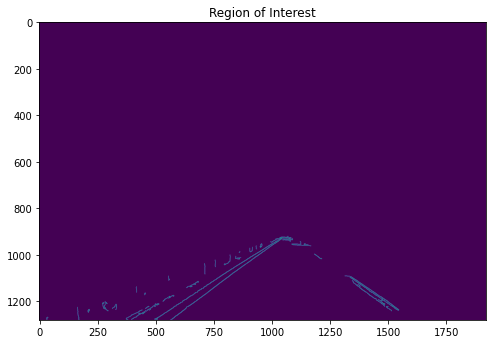

In [251]:
vertices = np.array([[(0,image.shape[0]),(1050, 920), (1070, 920), (image.shape[1],image.shape[0])]], dtype=np.int32)

mask = np.zeros_like(edges)   
ignore_mask_color = 255
    
#filling pixels inside the polygon defined by "vertices" with the fill color    
cv2.fillPoly(mask, vertices, ignore_mask_color)

#returning the image only where mask pixels are nonzero
masked_image = cv2.bitwise_and(edges, mask)

plt.figure(figsize=(8,6))
plt.title("Region of Interest")
plt.imshow(mask)

plt.figure(figsize=(8,6))
plt.title("Region of Interest")
plt.imshow(masked_image)

Mask on Main image

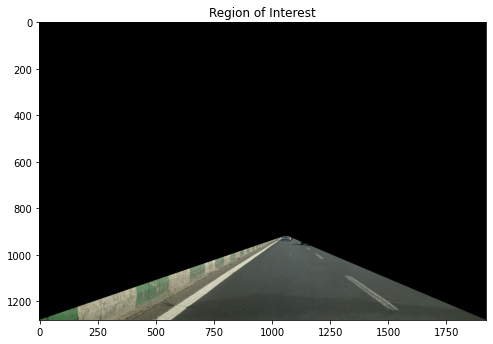

In [258]:
colorful_mask = cv2.merge((mask , mask , mask))

main_masked_image = cv2.bitwise_and(image, colorful_mask)
plt.figure(figsize=(8,6))
plt.title("Region of Interest")
plt.imshow(cv2.cvtColor(main_masked_image, cv2.COLOR_BGR2RGB))


Use HoughLinesP

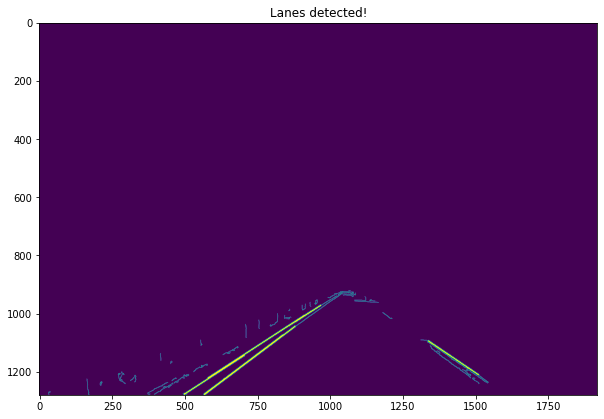

In [259]:
img = masked_image.copy()

lines = cv2.HoughLinesP(masked_image, 1, np.pi/180, 150, minLineLength=1, maxLineGap=50)
# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)

plt.figure(figsize=(10,7))
plt.title("Lanes detected!")
plt.imshow(img)

Use HoughLinesP on Main masked image

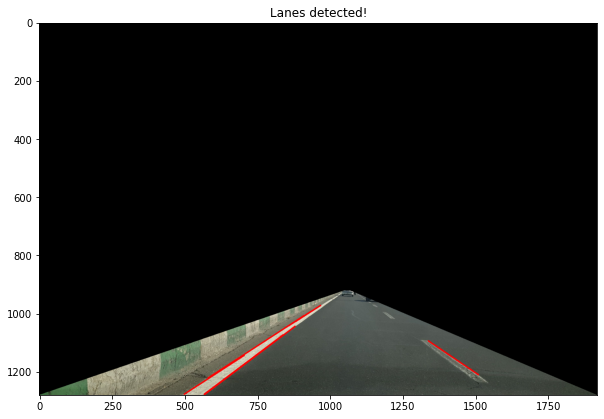

In [262]:
img = main_masked_image.copy()

lines = cv2.HoughLinesP(masked_image, 1, np.pi/180, 150, minLineLength=1, maxLineGap=50)
# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 3)

plt.figure(figsize=(10,7))
plt.title("Lanes detected!")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Use HoughLinesP on Main image

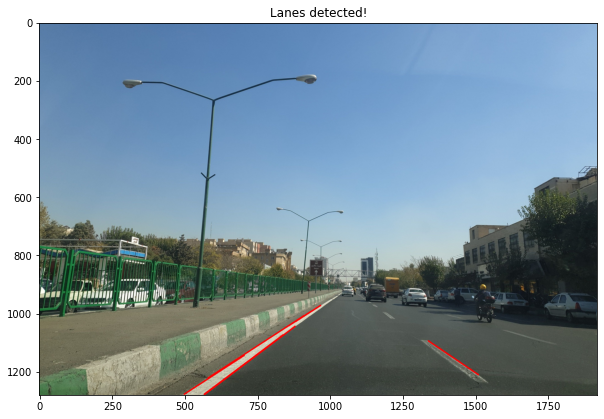

In [263]:
img = image.copy()

lines = cv2.HoughLinesP(masked_image, 1, np.pi/180, 150, minLineLength=1, maxLineGap=50)
# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 3)

plt.figure(figsize=(10,7))
plt.title("Lanes detected!")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Calculate Means

In [268]:
line_img = np.zeros((main_masked_image.shape[0], main_masked_image.shape[1], 3), dtype=np.uint8)

color=[255, 0, 0]
thickness=5

x_bottom_pos = []
x_upperr_pos = []
x_bottom_neg = []
x_upperr_neg = []

y_bottom = 908
y_upperr = 1300

slope = 0
b = 0

for line in lines:
    for x1,y1,x2,y2 in line:
        #test and filter values to slope
        if ((y2-y1)/(x2-x1)) > 0 :
            
            slope = ((y2-y1)/(x2-x1))
            b = y1 - slope*x1
            
            x_bottom_pos.append((y_bottom - b)/slope)
            x_upperr_pos.append((y_upperr - b)/slope)
                                  
        elif ((y2-y1)/(x2-x1)) < 0:
        
            slope = ((y2-y1)/(x2-x1))
            b = y1 - slope*x1
            
            x_bottom_neg.append((y_bottom - b)/slope)
            x_upperr_neg.append((y_upperr - b)/slope)

#creating a new 2d array with means
lines_mean = np.array([[int(np.mean(x_bottom_pos)), int(np.mean(y_bottom)), int(np.mean(x_upperr_pos)), int(np.mean(y_upperr))],
                        [int(np.mean(x_bottom_neg)), int(np.mean(y_bottom)), int(np.mean(x_upperr_neg)), int(np.mean(y_upperr))]])


#Drawing the lines
for i in range(len(lines_mean)):
    cv2.line(line_img, (lines_mean[i,0], lines_mean[i,1]), (lines_mean[i,2], lines_mean[i,3]), color, thickness)

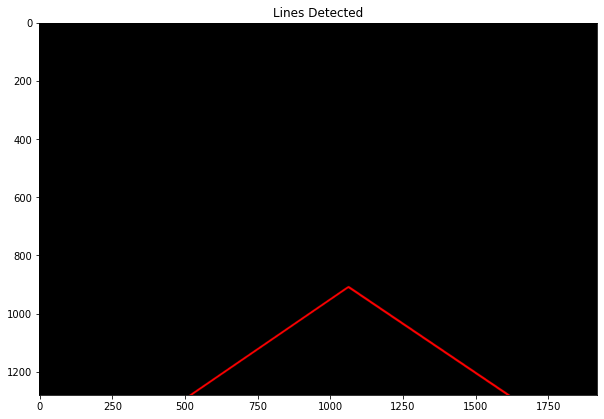

In [269]:
plt.figure(figsize=(10,7))
plt.title("Lines Detected")
plt.imshow(line_img)

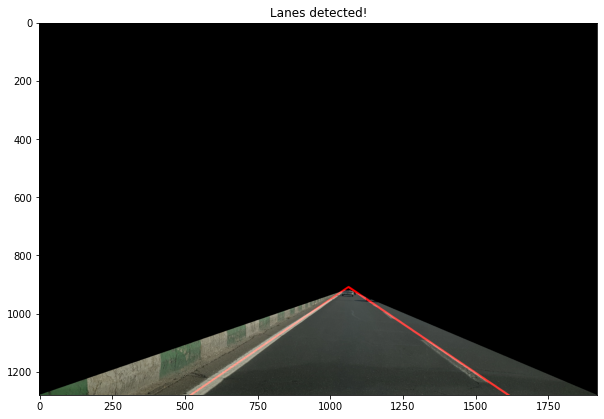

In [266]:
# initial_img * α + img * β + λ
lines_edges = cv2.addWeighted(cv2.cvtColor(main_masked_image, cv2.COLOR_BGR2RGB), 0.8, line_img, 1., 0)
plt.figure(figsize=(10,7))
plt.title("Lanes detected!")
plt.imshow(lines_edges)

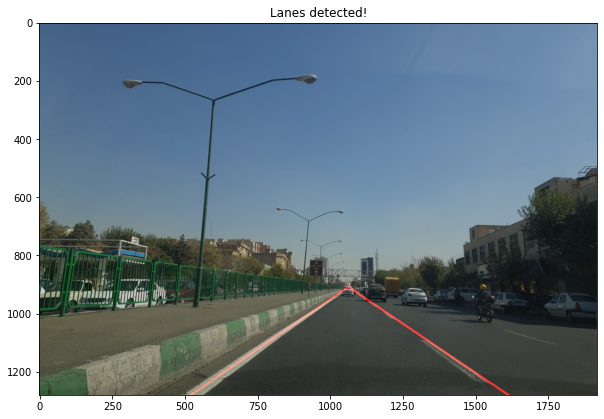

In [270]:
# initial_img * α + img * β + λ
lines_edges = cv2.addWeighted(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 0.8, line_img, 1., 0)
plt.figure(figsize=(10,7))
plt.title("Lanes detected!")
plt.imshow(lines_edges)